In [1]:
# Step 1: Import required Python libraries

import numpy as np
import pandas as pd
import os
import cv2  # for image processing
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import seaborn as sns  # for beautiful visualizations

print("All libraries imported successfully.")

All libraries imported successfully.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import os

# Path to the ZIP file in your Google Drive
zip_path = '/content/drive/MyDrive/image_only.zip.zip'

# Directory where files will be extracted
extract_path = '/content/images'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Images extracted to:", extract_path)

✅ Images extracted to: /content/images


In [5]:
import os

main_path = '/content/images'
subfolders = os.listdir(main_path)

print("Contents inside /content/images:")
print(subfolders)

Contents inside /content/images:
['images']


In [6]:
image_folder = '/content/images/images'  # 👈 corrected path

image_files = os.listdir(image_folder)

print(f"Total images found: {len(image_files)}")
print("First 5 images:", image_files[:5])

Total images found: 3642
First 5 images: ['Train_1322.jpg', 'Train_111.jpg', 'Train_56.jpg', 'Train_1508.jpg', 'Test_1344.jpg']


In [7]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('train.csv')

# Show basic info
print("Shape of CSV:", df.shape)
df.head()

Shape of CSV: (1821, 5)


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


from matplotlib import pyplot as plt
_df_0['healthy'].plot(kind='hist', bins=20, title='healthy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['multiple_diseases'].plot(kind='hist', bins=20, title='multiple_diseases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rust'].plot(kind='hist', bins=20, title='rust')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['scab'].plot(kind='hist', bins=20, title='scab')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('image_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='healthy', y='multiple_diseases', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='multiple_diseases', y='rust', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='rust', y='scab', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['healthy'].plot(kind='line', figsize=(8, 4), title='healthy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['multiple_diseases'].plot(kind='line', figsize=(8, 4), title='multiple_diseases')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['rust'].plot(kind='line', figsize=(8, 4), title='rust')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['scab'].plot(kind='line', figsize=(8, 4), title='scab')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='healthy', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='multiple_diseases', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='rust', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['image_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='scab', y='image_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
import cv2
import numpy as np
from tqdm import tqdm

# Folder where images are stored
image_folder = '/content/images'

# Helper function to extract features from an image
def extract_features(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (128, 128))  # Resize for consistency
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Feature 1: Color histogram (flattened)
        hist_r = cv2.calcHist([img], [0], None, [16], [0, 256]).flatten()
        hist_g = cv2.calcHist([img], [1], None, [16], [0, 256]).flatten()
        hist_b = cv2.calcHist([img], [2], None, [16], [0, 256]).flatten()

        hist_features = np.concatenate([hist_r, hist_g, hist_b])
        hist_features = hist_features / np.sum(hist_features)  # Normalize

        return hist_features
    except:
        return np.zeros(48)  # Return zeros if image can't be processed

# Create feature matrix
feature_list = []
image_ids = []

for image_id in tqdm(df['image_id']):
    image_path = os.path.join(image_folder, image_id + '.jpg')
    features = extract_features(image_path)
    feature_list.append(features)
    image_ids.append(image_id)

# Convert to numpy array
X = np.array(feature_list)
print(" Feature matrix shape:", X.shape)

100%|██████████| 1821/1821 [00:00<00:00, 4871.25it/s]

 Feature matrix shape: (1821, 48)


In [10]:
print(df.columns)

Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [11]:
import pandas as pd
import os

# Read the CSV file
df = pd.read_csv('train.csv')

# Show basic info
print("Shape of CSV:", df.shape)
print("CSV columns:", df.columns.tolist())

# Convert one-hot labels to single label column
df['label'] = df[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)

# Display first few rows
print("\nOne-hot encoded labels converted to single label:")
print(df[['image_id', 'label']].head())

Shape of CSV: (1821, 5)
CSV columns: ['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab']

One-hot encoded labels converted to single label:
  image_id              label
0  Train_0               scab
1  Train_1  multiple_diseases
2  Train_2            healthy
3  Train_3               rust
4  Train_4            healthy


In [12]:
import cv2
import numpy as np
from tqdm import tqdm

# Image folder path
image_folder = '/content/images'

# Feature extraction function
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))  # Resize for consistency
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0,256, 0,256, 0,256])  # 3D color histogram
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Prepare dataset
features = []
labels = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    image_name = row['image_id'] + '.jpg'
    image_path = os.path.join(image_folder, image_name)

    if os.path.exists(image_path):
        feat = extract_features(image_path)
        features.append(feat)
        labels.append(row['label'])

X = np.array(features)
y = np.array(labels)

print(" Feature matrix shape:", X.shape)
print(" Labels shape:", y.shape)

100%|██████████| 1821/1821 [00:00<00:00, 13640.46it/s]

 Feature matrix shape: (0,)
 Labels shape: (0,)


In [13]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from tqdm import tqdm

# Path where actual images are stored
image_folder = '/content/images/images'  # Fixed path

# Step 1: Load CSV
df = pd.read_csv('train.csv')
print("Shape of CSV:", df.shape)
print("CSV columns:", list(df.columns))

# Step 2: Convert one-hot labels to single label column
def get_label(row):
    for col in ['healthy', 'multiple_diseases', 'rust', 'scab']:
        if row[col] == 1:
            return col
df['label'] = df.apply(get_label, axis=1)
df = df[['image_id', 'label']]
print("\nOne-hot encoded labels converted to single label:")
print(df.head())

# Step 3: Feature Extraction from Images (raw pixels)
X = []
y = []
not_found = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(image_folder, row['image_id'] + '.jpg')

    if os.path.exists(img_path):
        img = Image.open(img_path).resize((64, 64))  # Resize to 64x64
        img = img.convert('RGB')  # Ensure 3 channels
        features = np.array(img).flatten()  # Flatten image into vector
        X.append(features)
        y.append(row['label'])
    else:
        not_found.append(img_path)

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print(" Feature matrix shape:", X.shape)
print(" Labels shape:", y.shape)

# Optional: Show any missing image paths
if not_found:
    print("\n Missing images:")
    for p in not_found[:10]:
        print("Not found:", p)

Shape of CSV: (1821, 5)
CSV columns: ['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab']

One-hot encoded labels converted to single label:
  image_id              label
0  Train_0               scab
1  Train_1  multiple_diseases
2  Train_2            healthy
3  Train_3               rust
4  Train_4            healthy


100%|██████████| 1821/1821 [01:14<00:00, 24.38it/s]

 Feature matrix shape: (1821, 12288)
 Labels shape: (1821,)


In [14]:
import numpy as np

labels = np.array(labels)

In [15]:
import os
print(sorted(os.listdir("images"))[:10])

['images']


In [16]:
import os

for root, dirs, files in os.walk("."):
    print(" Folder:", root)
    print(" Files:", files[:5])  # First 5 files
    print("---")

 Folder: .
 Files: ['train.csv']
---
 Folder: ./.config
 Files: ['gce', 'active_config', 'hidden_gcloud_config_universe_descriptor_data_cache_configs.db', '.last_survey_prompt.yaml', 'default_configs.db']
---
 Folder: ./.config/configurations
 Files: ['config_default']
---
 Folder: ./.config/logs
 Files: []
---
 Folder: ./.config/logs/2025.07.18
 Files: ['13.37.56.494776.log', '13.38.05.160246.log', '13.38.12.656589.log', '13.37.26.715641.log', '13.38.21.846801.log']
---
 Folder: ./drive
 Files: []
---
 Folder: ./drive/.shortcut-targets-by-id
 Files: []
---
 Folder: ./drive/MyDrive
 Files: ['Copy of Orders.csv', 'image_only.zip.zip']
---
 Folder: ./drive/MyDrive/Colab Notebooks
 Files: ['IMAGE TO PENCILE SKETCH.ipynb', 'Untitled0.ipynb', 'Assignment 7.ipynb', 'project.ipynb']
---
 Folder: ./drive/.Trash-0
 Files: []
---
 Folder: ./drive/.Trash-0/files
 Files: []
---
 Folder: ./drive/.Trash-0/info
 Files: []
---
 Folder: ./drive/.Encrypted
 Files: []
---
 Folder: ./drive/.Encrypted/.sho

In [17]:
image_folder = "images/images"

In [18]:
image_path = os.path.join(image_folder, image_id)

In [19]:
import pandas as pd

df = pd.read_csv("train.csv")
print(df.columns)

Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [20]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load CSV
df = pd.read_csv("train.csv")

# Step 2: Convert multi-label one-hot to single label (index of 1)
df['label'] = df[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)

# Optional: Encode string labels to integers
label_map = {'healthy': 0, 'multiple_diseases': 1, 'rust': 2, 'scab': 3}
df['label'] = df['label'].map(label_map)

# Step 3: Feature extraction from images
image_dir = "images/images"
features = []
labels = []

for idx, row in tqdm(df.iterrows(), total=len(df)):
    image_id = row['image_id']
    label = row['label']
    image_path = os.path.join(image_dir, image_id + ".jpg")

    if os.path.exists(image_path):
        img = Image.open(image_path).convert('RGB').resize((64, 64))
        features.append(np.array(img).flatten())  # Flattened pixel array
        labels.append(label)
    else:
        print(f"Image not found: {image_path}")

# Step 4: Convert to NumPy arrays
features = np.array(features)
labels = np.array(labels)

print("Features shape:", features.shape)
print(" Labels shape:", labels.shape)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)

# Step 6: Train an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)

print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" Accuracy Score:", accuracy_score(y_test, y_pred))

100%|██████████| 1821/1821 [01:37<00:00, 18.60it/s]


Features shape: (1821, 12288)
 Labels shape: (1821,)

 Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.52      0.46       103
           1       0.08      0.06      0.06        18
           2       0.46      0.38      0.41       125
           3       0.43      0.43      0.43       119

    accuracy                           0.42       365
   macro avg       0.34      0.35      0.34       365
weighted avg       0.42      0.42      0.41       365

 Accuracy Score: 0.4191780821917808


In [25]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))




Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.96      0.94      0.95        50
           2       0.86      0.91      0.89        47
           3       0.75      0.76      0.75        54
           4       0.82      0.97      0.89        60
           5       0.96      0.79      0.87        66
           6       0.93      0.96      0.94        53
           7       0.85      0.96      0.91        55
           8       0.68      0.63      0.65        43
           9       0.80      0.68      0.73        59

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.85      0.85      0.85       540

Random Forest Accuracy: 0.8518518518518519


In [24]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{np.int64(0): np.int64(125),
 np.int64(1): np.int64(132),
 np.int64(2): np.int64(130),
 np.int64(3): np.int64(129),
 np.int64(4): np.int64(121),
 np.int64(5): np.int64(116),
 np.int64(6): np.int64(128),
 np.int64(7): np.int64(124),
 np.int64(8): np.int64(131),
 np.int64(9): np.int64(121)}

In [26]:
from skimage.feature import hog


In [23]:
from skimage.feature import hog
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

def extract_hog_features(image_path, image_size=(128, 128)):
    image = imread(image_path)
    image = resize(image, image_size)
    gray_image = rgb2gray(image)
    features = hog(gray_image, pixels_per_cell=(16, 16),
                   cells_per_block=(2, 2), feature_vector=True)
    return features


In [22]:
# Import necessary libraries
from skimage.feature import hog
from skimage import exposure
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 1: Load dataset
digits = load_digits()
X = digits.images  # images (8x8 pixel)
y = digits.target  # labels

# Step 2: Extract HOG features for each image
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Convert image to float for HOG processing
        fd = hog(image, orientations=9, pixels_per_cell=(4,4),
                 cells_per_block=(2,2), block_norm='L2-Hys', visualize=False)
        hog_features.append(fd)
    return np.array(hog_features)

X_hog = extract_hog_features(X)

# Step 3: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.3, random_state=42)

# Step 4: Define models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42)
gbm_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Step 5: Train and evaluate each model
models = {'Random Forest': rf_clf, 'SVM': svm_clf, 'Gradient Boosting': gbm_clf}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Random Forest ---
Accuracy: 0.8388888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.96      0.90      0.93        50
           2       0.86      0.94      0.90        47
           3       0.71      0.76      0.73        54
           4       0.77      0.90      0.83        60
           5       0.91      0.80      0.85        66
           6       0.88      0.92      0.90        53
           7       0.89      0.98      0.93        55
           8       0.70      0.60      0.65        43
           9       0.81      0.66      0.73        59

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.83       540
weighted avg       0.84      0.84      0.84       540



--- SVM ---
Accuracy: 0.8722222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92 

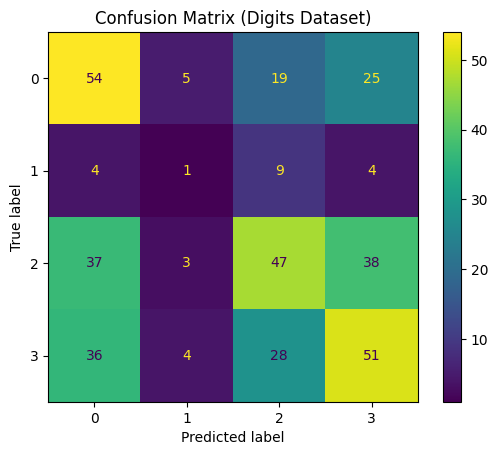

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# Automatically uses 0-9
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix (Digits Dataset)")
plt.show()
